# Section I. Main

### Load libraries, functions, palette, theme

In [224]:
# load libraries and palette
%run _libraries.ipynb

In [225]:
# load functions
# from __functions import *
%run _functions.ipynb

In [83]:
# start stopwatch
start = stopwatch_start()

### Variables

In [4]:
path_save_img = 'docs/img/'

## World PCI

In [5]:
data = pd.read_excel('data/pci_world.xls', sheet_name='Data')

In [6]:
data.columns = data.iloc[2, :].copy()

In [7]:
data = data.iloc[3:, :].copy()

In [8]:
data.columns = [to_int(i) for i in data.columns]

In [9]:
data.index = data['Country Name']

In [10]:
data.index.name = None

In [11]:
data = data.iloc[:, 4:].copy()

In [12]:
data = data.T.copy()

In [13]:
data_rf = data.loc[data['Russian Federation'].notna(), 'Russian Federation'].copy()

In [14]:
data['Turkmenistan']

1960   NaN
1961   NaN
1962   NaN
1963   NaN
1964   NaN
        ..
2019   NaN
2020   NaN
2021   NaN
2022   NaN
2023   NaN
Name: Turkmenistan, Length: 64, dtype: float64

In [15]:
a = arange(11)
b = [
    'Russian Federation', 'Latvia', 'Lithuania', 'Estonia', 'Belarus', 'Ukraine', 'Moldova', 'Georgia', 'Armenia',
    'Azerbaijan', 'Kazakhstan',
]

assert len(a) == len(b), 'Lengths not equal'

In [16]:
data_plot = data.loc[2016:2021, b].copy()

In [17]:
data_plot = data_plot.round(2)

In [18]:
data_plot.head()

,Russian Federation,Latvia,Lithuania,Estonia,Belarus,Ukraine,Moldova,Georgia,Armenia,Azerbaijan,Kazakhstan
2016,7.04,0.14,0.91,0.15,11.84,13.91,6.36,2.13,-1.40,12.44,14.55
2017,3.68,2.93,3.72,3.42,6.03,14.44,6.57,6.04,0.97,12.94,7.44
2018,2.88,2.53,2.70,3.44,4.87,10.95,3.05,2.62,2.52,2.27,6.02
2019,4.47,2.81,2.33,2.28,5.60,7.89,4.84,4.85,1.44,2.61,5.25
2020,3.38,0.22,1.20,-0.44,5.55,2.73,3.77,5.20,1.21,2.76,6.77


In [19]:
palette = [
    #    0 : 0.3    1 red      2 blue     3 green    4 yellow
        '#4F4F4F', '#A54E4B', '#5B89AF', '#487D6C', '#F3D963',
    #    5 brown    6 khaki    7 purple   8 pink     9 orange
        '#825947', '#8C9260', '#635F84', '#A85C72', '#CB7A44',
    #   -10 dark   -9 blue    -8 blue    -7 blue    -6 light
        '#304E68', '#3D6384', '#4D7DA8', '#6D9BC3', '#A7CBE8',
    #   -5 : 0.2   -4 : 0.5   -3 : 0.65  -2 : 0.75  -1 : 0.85
        '#353535', '#7F7F7F', '#A5A5A5', '#BFBFBF', '#D9D9D9'
    ]

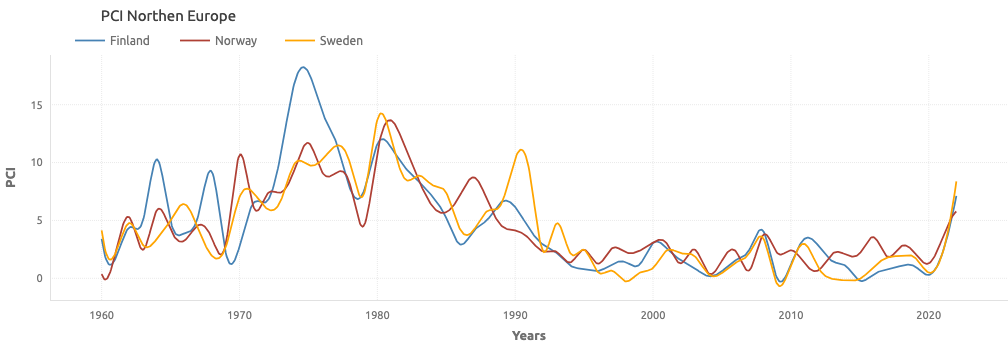

File 'pci_scandinavia.html' saved into folder 'docs/img/'


In [226]:
fig = pl_figure(figsize=(800, 350))

# pl_plot(
#     go.Scatter(x=data.index, y=data['Finland'], mode='lines+markers', line_color=palette[0], name='Finland'), fig)

pl_plot(
    go.Scatter(
        x=smoothed(data['Finland'][:-1]).index,
        y=smoothed(data['Finland'][:-1]).values.ravel(),
        mode='lines', line_color=palette[2], hoverinfo='skip',
        name='Finland'), fig)
pl_plot(
    go.Scatter(
        x=data['Finland'][:-1].index,
        y=data['Finland'][:-1],
        marker=dict(opacity=0, size=6),
        # hoverlabel=dict(bordercolor=palette[2], font=dict(color='white')),
        mode='markers', line_color=palette[2], showlegend=False, name='Finland'), fig)

pl_plot(
    go.Scatter(
        x=smoothed(data['Norway'][:-1]).index,
        y=smoothed(data['Norway'][:-1]).values.ravel(),
        mode='lines', line_color=palette[1], hoverinfo='skip', name='Norway'), fig)
pl_plot(
    go.Scatter(
        x=data['Norway'][:-1].index,
        y=data['Norway'][:-1],
        marker=dict(opacity=0, size=6),
        # hoverlabel=dict(bordercolor=palette[1], font=dict(color='white')),
        mode='markers', line_color=palette[1], showlegend=False, name='Norway'), fig)

pl_plot(
    go.Scatter(
        x=smoothed(data['Sweden'][:-1]).index,
        y=smoothed(data['Sweden'][:-1]).values.ravel(),
        mode='lines', line_color=palette[4], hoverinfo='skip', name='Sweden'), fig)
pl_plot(
    go.Scatter(
        x=data['Sweden'][:-1].index,
        y=data['Sweden'][:-1],
        marker=dict(opacity=0, size=6),
        # hoverlabel=dict(bordercolor=palette[4], font=dict(color='white')),
        mode='markers', line_color=palette[4], showlegend=False, name='Sweden'), fig)

pl_labels(x='Years', y='PCI')
pl_title('PCI Northen Europe')

fig.show(config=config)
pl_savefig(fig, 'pci_scandinavia', dir=path_save_img, config=config)

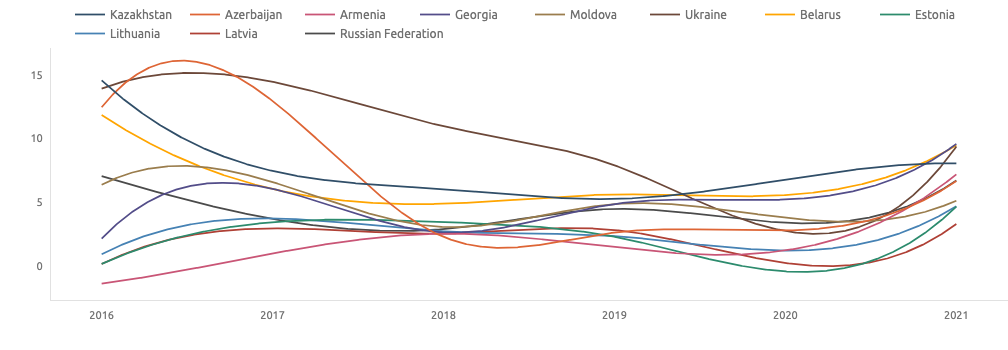

In [223]:
fig = pl_figure(figsize=(800, 350))

for i, j in zip(a, b):

    data_ = data_plot.loc[:, j].dropna()
    
    pl_plot(
    go.Scatter(
        x=smoothed(data_).index,
        y=smoothed(data_).values.ravel(),
        mode='lines', line_color=palette[i], hoverinfo='skip',
        name=j), fig)
    pl_plot(
        go.Scatter(
            x=data_.index,
            y=data_,
            marker=dict(opacity=0, size=6),
            mode='markers', line_color=palette[i], showlegend=False, name=j), fig)

fig.update_layout(
    legend=dict(xanchor='left', entrywidth=50, traceorder='reversed')
)

# fig.update_layout(
#     legend=dict(orientation='h', x=0, y=0, yanchor='top', xanchor='left')
# )

pl_grid()
fig.show(config=config)

In [22]:
config=dict(scrollZoom=True, showLink=False)

### Execution time

In [23]:
stopwatch_stop(start)

Execution time: 0:00:01
